## Support vector regression

### 1) Get the dataset

In [45]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

### Problem :

In an interview, a guy with 10+ yrs of experience claimed his previous salary to be 160K and was expecting the new salary to be more than that. The employer, being suspicious, contacted his previous employer and they gave him the following data,

In [46]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


The new employer also knows that this guy has been a region manager for 2 years. He also got the info that it would have taken atleast 4 years for next promotion in his previous company. **The new employer wants to use this data and find out if this guy was bluffing about his previous salary by predicting what would have been the salary at level 6.5**. This wll also give an idea to the employer to propose a new salary

### 2) Separate the dep and indep variables into a numpy array

Notice there is only one independent variable. Position is just encoded as level.

In [47]:
X = dataset.iloc[:,1:2].values #X should be of matrix format (10,1). If we used [:,1], we would have got a vector (10,)
y = dataset.iloc[:, 2].values

### 3) Predicting using Support vector regressor 

In [48]:
from sklearn.svm import SVR

In [49]:
help(SVR)

Help on class SVR in module sklearn.svm.classes:

class SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  epsilon : float, optional (default=0.1)
 |       Epsilon in the epsilon-SVR model. It specifies the epsilon-tube
 |       within which no penalty is associated in the training loss function
 |       with points predicted within a distance epsilon from the actual
 |       value.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. I

In [50]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
pred_sal = regressor.predict(6.5)
print(pred_sal)

[130001.558]


#### Visualize :

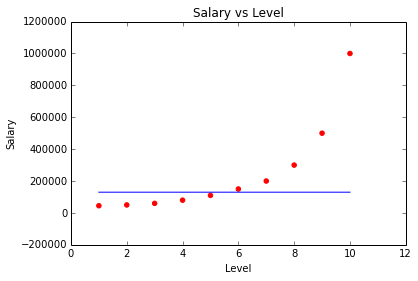

In [52]:
#Visualize
plt.scatter(X,y, color = 'red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("Salary vs Level")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Whats the problem?

The previous algorithms automatically did **feature scaling**, but here it doesnt.

In [53]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Xs = sc_X.fit_transform(X)
sc_y = StandardScaler()
ys = sc_y.fit_transform(y.reshape(-1,1)) ## Requires 2D array
print(y.shape)
print(y.reshape(-1,1).shape)
pd.DataFrame(np.column_stack((y,ys)),columns=["y","y scaled"])

(10,)
(10, 1)


,y,y scaled
0,45000.0,-0.720043
1,50000.0,-0.702438
2,60000.0,-0.667228
3,80000.0,-0.596808
4,110000.0,-0.491178
5,150000.0,-0.350339
6,200000.0,-0.174289
7,300000.0,0.177810
8,500000.0,0.882008
9,1000000.0,2.642503


#### Refit and visualize

Wrong salary : [252789.139] (Unscaled input given)
Correct salary : [170370.02]


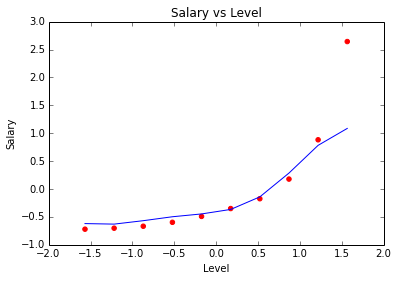

(1,)
(1, 1)


In [54]:
regressor = SVR(kernel='rbf')
regressor.fit(Xs,ys)

pred_sal = regressor.predict(6.5) # This is wrong as the input is not scaled!!
print( "Wrong salary :", sc_y.inverse_transform(pred_sal), r"(Unscaled input given)")
pred_sal = regressor.predict(sc_X.transform(np.array([[6.5]]))) # transform to np array of shape (1,1)
print("Correct salary :", sc_y.inverse_transform(pred_sal)) ##inverse transform

#Visualize
plt.scatter(Xs,ys, color = 'red')
plt.plot(Xs,regressor.predict(Xs),color='blue')
plt.title("Salary vs Level")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

print(np.array([6.5]).shape)
print(np.array([[6.5]]).shape)

#### Note that CEO is considered as outlier, unlike OLS models which were more sensitive to outliers